In [1]:
from keras.datasets import cifar10
from keras.models import model_from_json
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
num_classes = 10

In [3]:
def predict(x, model):
    pred = model.predict(np.array([x]), batch_size=1)
    pred_class = np.argmax(pred)
    pred_per = max(pred[0])
    
    return pred_class, pred_per

In [4]:
# データの読み込み
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 正規化
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

y_train_catego = to_categorical(y_train, num_classes)
y_test_catego = to_categorical(y_test, num_classes)

In [5]:
# モデルを読み込む
model = model_from_json(open('models/10_model.json').read())

# 学習結果を読み込む
model.load_weights('weights/10_weights.h5')

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

print(model.summary())






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928    

In [6]:
score = model.evaluate(x_test, y_test_catego, verbose=0)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

Test loss : 0.6479467066764831
Test accuracy : 0.7745


In [7]:
pred_classes = model.predict_classes(x_test)

In [8]:
label =['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

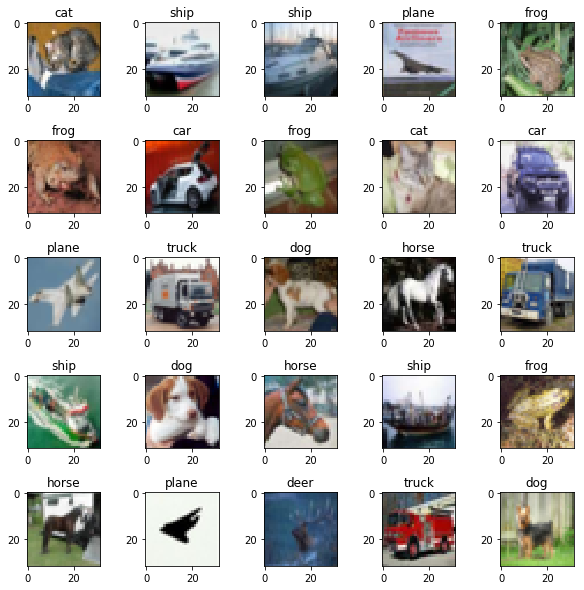

In [9]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i in range(25):
    cifar_img=plt.subplot(5,5,i+1)
    plt.imshow(x_test[i])
    plt.title(f'{label[int(y_test[i])]}')


plt.show()

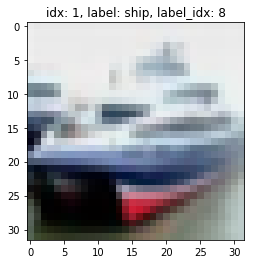

In [10]:
idx = 1
x = x_test[idx]
y = int(y_test[idx])

plt.imshow(x)
plt.title(f'idx: {idx}, label: {label[y]}, label_idx: {y}')
plt.show()

In [11]:
pred_class, pred_per = predict(x, model)
print(pred_class, pred_per)

8 0.93400156


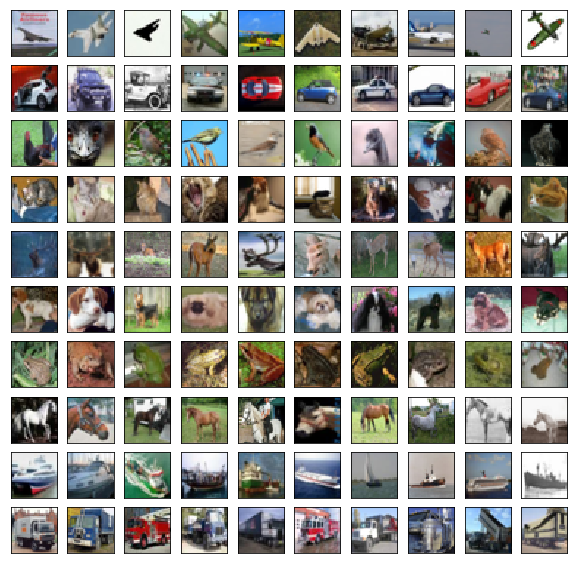

In [26]:
plt.figure(figsize=(10,10))
# plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i in range(10):
    idxs = np.where(np.array(list(map(int, y_test))) == i)[0]
    for c, idx in enumerate(idxs[:10]):
        cifar_img=plt.subplot(10,10,10*i+c+1)
        plt.tick_params(bottom=False,
                left=False,
                right=False,
                top=False)
        plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
        plt.imshow(x_test[idx])
        
# plt.show()
plt.savefig('cifar10.png', bbox_inches='tight', pad_inches=0)